# CLASSIFICATION(**SINIFLANDIRMA**)

In [117]:
import pandas as pd
import numpy as np

In [118]:
#verilerin yüklenmesi
veriler=pd.read_csv("/content/myinsurance.csv")
veriler

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [119]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

def one_hot_encode(data, columns):
    # Kategorik sütunları seçme
    categorical_data = data[columns]

    # One-Hot Encoder oluşturma
    encoder = OneHotEncoder(sparse=False, drop='first')

    # Kategorik veriyi dönüştürme
    encoded_data = encoder.fit_transform(categorical_data)

    # One-Hot Encoding sonucunu DataFrame'e dönüştürme
    encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(columns))

    # Dönüştürülmüş veriyi orijinal veriyle birleştirme
    preprocessed_data = pd.concat([data.drop(columns, axis=1), encoded_df], axis=1)

    return preprocessed_data




def min_max_scale(data, column):
    # Min-Max Scaler oluşturma
    scaler = MinMaxScaler()

    # Sütunu seçme ve ölçeklendirme
    scaled_column = scaler.fit_transform(data[[column]])

    # Ölçeklendirilmiş sütunu yeni bir DataFrame'e dönüştürme
    scaled_data = pd.DataFrame(scaled_column, columns=[column])

    # Ölçeklendirilmiş sütunu orijinal veri setine ekleme
    data[column] = scaled_data[column]

    return data


def fill_nan_with_mean(data):
    for column in data.columns:
        if data[column].isnull().any():
            mean = data[column].mean()
            data[column].fillna(mean, inplace=True)
    return data


def veriOnIsleme(data, columnsForOneHotEncoder, columnsForMinMaxScaler):
    dataForOneHot = one_hot_encode(data, columnsForOneHotEncoder)
    for column in columnsForMinMaxScaler:
        dataForOneHot = min_max_scale(dataForOneHot, column)  # Düzeltme: dataForOneHot kullanılmalı
    result = fill_nan_with_mean(dataForOneHot)
    return result

In [120]:
veriSetim=pd.read_csv("/content/myinsurance.csv")
veriOnİslemeliSetDuzelt=veriOnIsleme(veriSetim, ["sex","region"], ["children", "bmi", "age","charges"])
#veriOnİslemeliSetDuzelt=veriOnİslemeliSetDuzelt.drop(["RowNumber","CustomerId","Surname", "Geography", "Gender"], axis=1)

MyX = veriOnİslemeliSetDuzelt.drop(columns="smoker",axis=1)
MyY = veriSetim["smoker"]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [121]:
MyX

,age,bmi,children,charges,sex_male,region_northwest,region_southeast,region_southwest
0,0.021739,0.321227,0.0,0.251611,0.0,0.0,0.0,1.0
1,0.000000,0.479150,0.2,0.009636,1.0,0.0,1.0,0.0
2,0.217391,0.458434,0.6,0.053115,1.0,0.0,1.0,0.0
3,0.326087,0.181464,0.0,0.333010,1.0,1.0,0.0,0.0
4,0.304348,0.347592,0.0,0.043816,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
1333,0.695652,0.403820,0.6,0.151299,1.0,1.0,0.0,0.0
1334,0.000000,0.429379,0.0,0.017305,0.0,0.0,0.0,0.0
1335,0.000000,0.562012,0.0,0.008108,0.0,0.0,1.0,0.0
1336,0.065217,0.264730,0.0,0.014144,0.0,0.0,0.0,1.0


In [122]:
MyY

0       yes
1        no
2        no
3        no
4        no
       ... 
1333     no
1334     no
1335     no
1336     no
1337    yes
Name: smoker, Length: 1338, dtype: object

In [123]:
def parcalamaIslemi(A,B):
  from sklearn.model_selection import train_test_split
  X_train, X_test, Y_train, Y_test = train_test_split(A, B,test_size=0.2,random_state=42)
  return X_train, X_test, Y_train, Y_test

In [124]:
MyX_train, MyX_test, MyY_train, MyY_test=parcalamaIslemi(MyX, MyY)

Logistic **Regression**

In [125]:
#BURADA Y DEĞERLERİ YES/NO ŞEKLİNDE OLDUĞU İÇİN 1/0 ŞEKLİNE ÇEVİRDİM
from sklearn.preprocessing import LabelEncoder
# Encode target variable
le = LabelEncoder()
MyY_train_encoded = le.fit_transform(MyY_train)
MyY_test_encoded = le.transform(MyY_test)
MyY_train=MyY_train_encoded
MyY_test=MyY_test_encoded

In [126]:
#Lojistik Regresyon
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
logr=LogisticRegression(random_state=(42))
logr.fit(MyX_train, MyY_train)
y_predLogistic=logr.predict(MyX_test)
cm=confusion_matrix(MyY_test,y_predLogistic)
print("Logistic R. confısuon matrix")
print(cm)

Logistic R. confısuon matrix
[[210   4]
 [ 23  31]]


In [127]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix
def calculate_metrics(y_true, y_pred):
    # Calculate F1 score
    f1 = f1_score(y_true, y_pred)

    # Calculate precision
    precision = precision_score(y_true, y_pred)

    # Calculate sensitivity (recall)
    sensitivity = recall_score(y_true, y_pred)

    # Calculate specificity
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    specificity = tn / (tn + fp)

    # Calculate ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)

    return f1, precision, sensitivity, specificity, roc_auc, fpr, tpr

In [128]:
def calculate_accuracy(y_true, y_pred):
    correct_predictions = 0
    total_predictions = len(y_true)

    for true_label, pred_label in zip(y_true, y_pred):
        if true_label == pred_label:
            correct_predictions += 1

    accuracy = correct_predictions / total_predictions
    return accuracy

In [129]:
# LOGISTIC REGRESSİON METRİCS

f1, precision, sensitivity, specificity, roc_auc, fpr, tpr = calculate_metrics(MyY_test, y_predLogistic)
print("F1 Score:", f1)
print("Precision:", precision)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("ROC AUC:", roc_auc)
#------------------------------------------------------------
accuracyLG=calculate_accuracy(MyY_test, y_predLogistic)
print("Accuracy",accuracyLG)
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
# Calculate metrics
mse = mean_squared_error(MyY_test, y_predLogistic)
r2 = r2_score(MyY_test, y_predLogistic)
# Print the metrics
print("Mean Squared Error (MSE):", mse)
print("Coefficient of Determination (R^2):", r2)
#   MAE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(MyY_test, y_predLogistic)
print("Ortalama Mutlak Hata (MAE):", mae)
# RMSE
rmse = np.sqrt(mse)
print("Kök Ortalama Kare Hata (RMSE):", rmse)

F1 Score: 0.6966292134831461
Precision: 0.8857142857142857
Sensitivity (Recall): 0.5740740740740741
Specificity: 0.9813084112149533
ROC AUC: 0.7776912426445136
Accuracy 0.8992537313432836
Mean Squared Error (MSE): 0.10074626865671642
Coefficient of Determination (R^2): 0.3738317757009345
Ortalama Mutlak Hata (MAE): 0.10074626865671642
Kök Ortalama Kare Hata (RMSE): 0.3174055271363692


KNN **ALGORITHM**

In [130]:
#KNN ALGORİTMASI
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1,metric="minkowski")
knn.fit(MyX_train, MyY_train)
y_predKNN=knn.predict(MyX_test)
cm2=confusion_matrix(MyY_test,y_predKNN)
print("KNN")
print(cm2)

KNN
[[205   9]
 [  5  49]]


In [131]:
# KNN ALGORİTHM METRİCS

f1, precision, sensitivity, specificity, roc_auc, fpr, tpr = calculate_metrics(MyY_test, y_predKNN)
print("F1 Score:", f1)
print("Precision:", precision)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("ROC AUC:", roc_auc)
#------------------------------------------------------------
accuracyKNN=calculate_accuracy(MyY_test, y_predKNN)
print("Accuracy",accuracyKNN)
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
# Calculate metrics
mse = mean_squared_error(MyY_test, y_predKNN)
r2 = r2_score(MyY_test, y_predKNN)
# Print the metrics
print("Mean Squared Error (MSE):", mse)
print("Coefficient of Determination (R^2):", r2)
#   MAE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(MyY_test, y_predKNN)
print("Ortalama Mutlak Hata (MAE):", mae)
# RMSE
rmse = np.sqrt(mse)
print("Kök Ortalama Kare Hata (RMSE):", rmse)

F1 Score: 0.875
Precision: 0.8448275862068966
Sensitivity (Recall): 0.9074074074074074
Specificity: 0.9579439252336449
ROC AUC: 0.9326756663205262
Accuracy 0.9477611940298507
Mean Squared Error (MSE): 0.05223880597014925
Coefficient of Determination (R^2): 0.6753201799930771
Ortalama Mutlak Hata (MAE): 0.05223880597014925
Kök Ortalama Kare Hata (RMSE): 0.22855810195691872


SVM(SUPPORT VECTOR MACHINE) DESTEK **VEKTORU**

In [132]:
from sklearn.svm import SVC
svc=SVC(kernel="poly")
svc.fit(MyX_train, MyY_train)
y_predsvm=svc.predict(MyX_test)
cm3=confusion_matrix(MyY_test,y_predsvm)
print("SVM")
print(cm3)

SVM
[[207   7]
 [ 10  44]]


In [133]:
# SVM(SUPPORT VECTOR MACHINE)  METRİCS

f1, precision, sensitivity, specificity, roc_auc, fpr, tpr = calculate_metrics(MyY_test, y_predsvm)
print("F1 Score:", f1)
print("Precision:", precision)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("ROC AUC:", roc_auc)
#------------------------------------------------------------
accuracySVM=calculate_accuracy(MyY_test, y_predsvm)
print("Accuracy",accuracySVM)
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
# Calculate metrics
mse = mean_squared_error(MyY_test, y_predsvm)
r2 = r2_score(MyY_test, y_predsvm)
# Print the metrics
print("Mean Squared Error (MSE):", mse)
print("Coefficient of Determination (R^2):", r2)
#   MAE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(MyY_test, y_predsvm)
print("Ortalama Mutlak Hata (MAE):", mae)
# RMSE
rmse = np.sqrt(mse)
print("Kök Ortalama Kare Hata (RMSE):", rmse)

F1 Score: 0.838095238095238
Precision: 0.8627450980392157
Sensitivity (Recall): 0.8148148148148148
Specificity: 0.9672897196261683
ROC AUC: 0.8910522672204917
Accuracy 0.9365671641791045
Mean Squared Error (MSE): 0.06343283582089553
Coefficient of Determination (R^2): 0.6057459328487366
Ortalama Mutlak Hata (MAE): 0.06343283582089553
Kök Ortalama Kare Hata (RMSE): 0.2518587616520329


NAIVE **BAYES**

In [134]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(MyX_train, MyY_train)
y_prednaiveBayes=nb.predict(MyX_test)
cm4=confusion_matrix(MyY_test,y_prednaiveBayes)
print("Naive Bayes")
print(cm4)

Naive Bayes
[[204  10]
 [ 12  42]]


In [135]:
# NAIVE BAYES  METRİCS

f1, precision, sensitivity, specificity, roc_auc, fpr, tpr = calculate_metrics(MyY_test, y_prednaiveBayes)
print("F1 Score:", f1)
print("Precision:", precision)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("ROC AUC:", roc_auc)
#------------------------------------------------------------
accuracyNaiveBayes=calculate_accuracy(MyY_test, y_prednaiveBayes)
print("Accuracy",accuracyNaiveBayes)
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
# Calculate metrics
mse = mean_squared_error(MyY_test, y_prednaiveBayes)
r2 = r2_score(MyY_test, y_prednaiveBayes)
# Print the metrics
print("Mean Squared Error (MSE):", mse)
print("Coefficient of Determination (R^2):", r2)
#   MAE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(MyY_test, y_prednaiveBayes)
print("Ortalama Mutlak Hata (MAE):", mae)
# RMSE
rmse = np.sqrt(mse)
print("Kök Ortalama Kare Hata (RMSE):", rmse)

F1 Score: 0.7924528301886792
Precision: 0.8076923076923077
Sensitivity (Recall): 0.7777777777777778
Specificity: 0.9532710280373832
ROC AUC: 0.8655244029075805
Accuracy 0.917910447761194
Mean Squared Error (MSE): 0.08208955223880597
Coefficient of Determination (R^2): 0.48978885427483554
Ortalama Mutlak Hata (MAE): 0.08208955223880597
Kök Ortalama Kare Hata (RMSE): 0.28651274358884277


DECİSİON **TREE**

In [136]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion="entropy")
dtc.fit(MyX_train, MyY_train)
y_predDT=dtc.predict(MyX_test)
cm5=confusion_matrix(MyY_test,y_predDT)
print("Decision Tree")
print(cm5)

Decision Tree
[[206   8]
 [  4  50]]


In [137]:
# DECİSİON TREE  METRİCS

f1, precision, sensitivity, specificity, roc_auc, fpr, tpr = calculate_metrics(MyY_test, y_predDT)
print("F1 Score:", f1)
print("Precision:", precision)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("ROC AUC:", roc_auc)
#------------------------------------------------------------
accuracyDT=calculate_accuracy(MyY_test, y_predDT)
print("Accuracy",accuracyDT)
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
# Calculate metrics
mse = mean_squared_error(MyY_test, y_predDT)
r2 = r2_score(MyY_test, y_predDT)
# Print the metrics
print("Mean Squared Error (MSE):", mse)
print("Coefficient of Determination (R^2):", r2)
#   MAE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(MyY_test, y_predDT)
print("Ortalama Mutlak Hata (MAE):", mae)
# RMSE
rmse = np.sqrt(mse)
print("Kök Ortalama Kare Hata (RMSE):", rmse)

F1 Score: 0.8928571428571429
Precision: 0.8620689655172413
Sensitivity (Recall): 0.9259259259259259
Specificity: 0.9626168224299065
ROC AUC: 0.9442713741779163
Accuracy 0.9552238805970149
Mean Squared Error (MSE): 0.04477611940298507
Coefficient of Determination (R^2): 0.7217030114226375
Ortalama Mutlak Hata (MAE): 0.04477611940298507
Kök Ortalama Kare Hata (RMSE): 0.21160368475757949


RANDOM **FOREST**(Rassal Orman)

In [138]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=10,criterion="entropy")
rfc.fit(MyX_train, MyY_train)
y_predRF=rfc.predict(MyX_test)
cm6=confusion_matrix(MyY_test,y_predRF)
print("Random Forest")
print(cm6)

Random Forest
[[206   8]
 [  8  46]]


In [139]:
# RANDOM FOREST(Rassal Orman)  METRİCS

f1, precision, sensitivity, specificity, roc_auc, fpr, tpr = calculate_metrics(MyY_test, y_predRF)
print("F1 Score:", f1)
print("Precision:", precision)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("ROC AUC:", roc_auc)
#------------------------------------------------------------
accuracyRF=calculate_accuracy(MyY_test, y_predRF)
print("Accuracy",accuracyRF)
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
# Calculate metrics
mse = mean_squared_error(MyY_test, y_predRF)
r2 = r2_score(MyY_test, y_predRF)
# Print the metrics
print("Mean Squared Error (MSE):", mse)
print("Coefficient of Determination (R^2):", r2)
#   MAE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(MyY_test, y_predRF)
print("Ortalama Mutlak Hata (MAE):", mae)
# RMSE
rmse = np.sqrt(mse)
print("Kök Ortalama Kare Hata (RMSE):", rmse)

F1 Score: 0.8518518518518519
Precision: 0.8518518518518519
Sensitivity (Recall): 0.8518518518518519
Specificity: 0.9626168224299065
ROC AUC: 0.9072343371408792
Accuracy 0.9402985074626866
Mean Squared Error (MSE): 0.05970149253731343
Coefficient of Determination (R^2): 0.6289373485635168
Ortalama Mutlak Hata (MAE): 0.05970149253731343
Kök Ortalama Kare Hata (RMSE): 0.24433888871261045


In [140]:
pip install tabulate

In [150]:
from tabulate import tabulate

# Initialize an empty list to store the results
results = []

# Logistic Regression
logistic_metrics = list(calculate_metrics(MyY_test, y_predLogistic))
mse = mean_squared_error(MyY_test, y_predLogistic)
mae = mean_absolute_error(MyY_test, y_predLogistic)
rmse = np.sqrt(mse)
logistic_metrics.extend([mse, mae, rmse])
x=list()
results.append([] + x)
results.append(["Logistic Regression"] + logistic_metrics)

# KNN Algorithm
knn_metrics = list(calculate_metrics(MyY_test, y_predKNN))
mse = mean_squared_error(MyY_test, y_predKNN)
mae = mean_absolute_error(MyY_test, y_predKNN)
rmse = np.sqrt(mse)
knn_metrics.extend([mse, mae, rmse])
results.append([] + x)
results.append(["KNN Algorithm"] + knn_metrics)

# SVM (Support Vector Machine)
svm_metrics = list(calculate_metrics(MyY_test, y_predsvm))
mse = mean_squared_error(MyY_test, y_predsvm)
mae = mean_absolute_error(MyY_test, y_predsvm)
rmse = np.sqrt(mse)
svm_metrics.extend([mse, mae, rmse])
results.append([] + x)
results.append(["SVM"] + svm_metrics)

# Naive Bayes
naivebayes_metrics = list(calculate_metrics(MyY_test, y_prednaiveBayes))
mse = mean_squared_error(MyY_test, y_prednaiveBayes)
mae = mean_absolute_error(MyY_test, y_prednaiveBayes)
rmse = np.sqrt(mse)
naivebayes_metrics.extend([mse, mae, rmse])
results.append([] + x)
results.append(["Naive Bayes"] + naivebayes_metrics)

# Decision Tree
dt_metrics = list(calculate_metrics(MyY_test, y_predDT))
mse = mean_squared_error(MyY_test, y_predDT)
mae = mean_absolute_error(MyY_test, y_predDT)
rmse = np.sqrt(mse)
dt_metrics.extend([mse, mae, rmse])
results.append([] + x)
results.append(["Decision Tree"] + dt_metrics)

# Random Forest
rf_metrics = list(calculate_metrics(MyY_test, y_predRF))
mse = mean_squared_error(MyY_test, y_predRF)
mae = mean_absolute_error(MyY_test, y_predRF)
rmse = np.sqrt(mse)
rf_metrics.extend([mse, mae, rmse])
results.append([] + x)
results.append(["Random Forest"] + rf_metrics)
# Print the results as a table with right alignment
headers = ["Model", "F1 Score", "Precision", "Sensitivity (Recall)", "Specificity", "ROC AUC",
           "Mean Squared Error (MSE)", "MAE", "RMSE"]
table = tabulate(results, headers=headers, tablefmt="grid", numalign="right")
table_lines = table.split("\n")
formatted_table = "\n".join([line.rstrip() for line in table_lines[2:]])
print(table_lines[0] + "\n" + table_lines[1] + "\n" + formatted_table)

+---------------------+------------+-------------+------------------------+---------------+-----------+------------------------------------+------------------------------------+-----------+
| Model               |   F1 Score |   Precision |   Sensitivity (Recall) |   Specificity |   ROC AUC | Mean Squared Error (MSE)           | MAE                                |      RMSE |
+=====================+============+=============+========================+===============+===========+====================================+====================================+===========+
|                     |            |             |                        |               |           |                                    |                                    |           |
+---------------------+------------+-------------+------------------------+---------------+-----------+------------------------------------+------------------------------------+-----------+
| Logistic Regression |   0.696629 |    0.885714 |

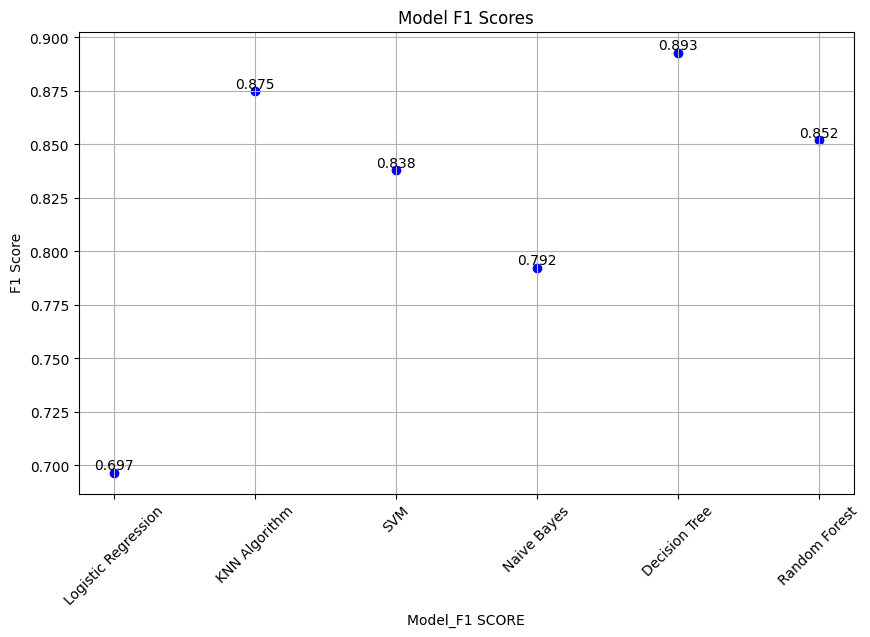

In [142]:
# F1 SCORE PLOT    F1 Score |   Precision |   Sensitivity (Recall) |   Specificity |   ROC AUC
import matplotlib.pyplot as plt

models = ['Logistic Regression', 'KNN Algorithm', 'SVM', 'Naive Bayes', 'Decision Tree', 'Random Forest']
f1_scores = [logistic_metrics[0], knn_metrics[0], svm_metrics[0], naivebayes_metrics[0], dt_metrics[0], rf_metrics[0]]

plt.figure(figsize=(10, 6))
plt.scatter(models, f1_scores, color='blue', marker='o')

plt.xlabel('Model_F1 SCORE')
plt.ylabel('F1 Score')
plt.title('Model F1 Scores')
plt.xticks(rotation=45)

for i in range(len(models)):
    plt.text(models[i], f1_scores[i], f"{f1_scores[i]:.3f}", ha='center', va='bottom')
plt.grid(True)
plt.show()

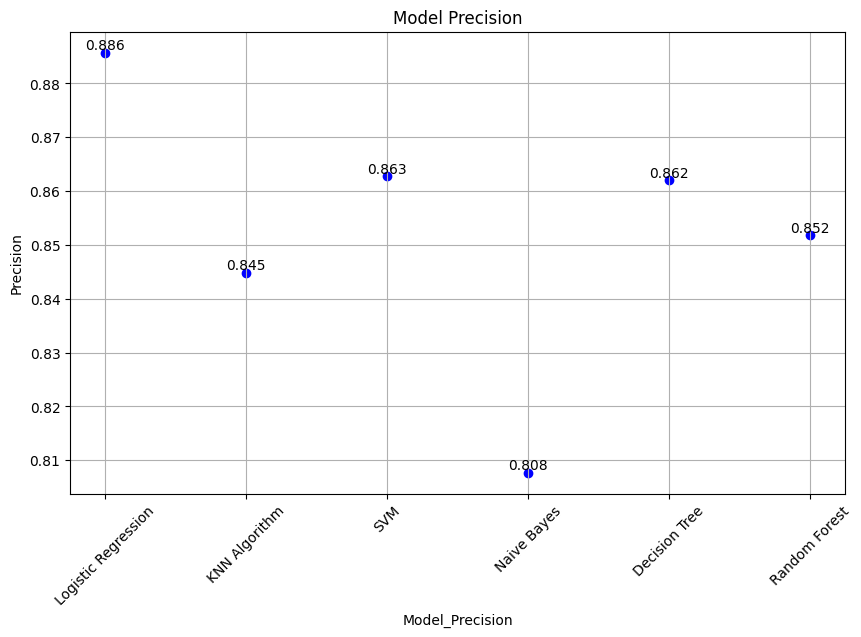

In [143]:
# Precision PLOT
import matplotlib.pyplot as plt

models = ['Logistic Regression', 'KNN Algorithm', 'SVM', 'Naive Bayes', 'Decision Tree', 'Random Forest']
Precision = [logistic_metrics[1], knn_metrics[1], svm_metrics[1], naivebayes_metrics[1], dt_metrics[1], rf_metrics[1]]

plt.figure(figsize=(10, 6))
plt.scatter(models, Precision, color='blue', marker='o')

plt.xlabel('Model_Precision')
plt.ylabel('Precision')
plt.title('Model Precision')
plt.xticks(rotation=45)

for i in range(len(models)):
    plt.text(models[i], Precision[i], f"{Precision[i]:.3f}", ha='center', va='bottom')
plt.grid(True)
plt.show()

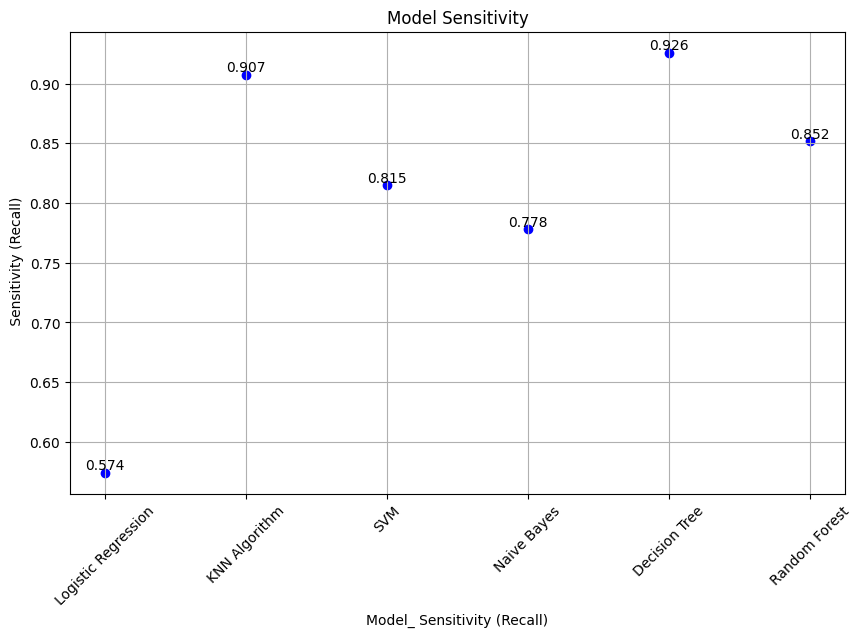

In [144]:
#  Sensitivity (Recall) PLOT
import matplotlib.pyplot as plt

models = ['Logistic Regression', 'KNN Algorithm', 'SVM', 'Naive Bayes', 'Decision Tree', 'Random Forest']
Sensitivity = [logistic_metrics[2], knn_metrics[2], svm_metrics[2], naivebayes_metrics[2], dt_metrics[2], rf_metrics[2]]

plt.figure(figsize=(10, 6))
plt.scatter(models, Sensitivity, color='blue', marker='o')

plt.xlabel('Model_ Sensitivity (Recall)')
plt.ylabel(' Sensitivity (Recall)')
plt.title('Model Sensitivity')
plt.xticks(rotation=45)

for i in range(len(models)):
    plt.text(models[i], Sensitivity[i], f"{Sensitivity[i]:.3f}", ha='center', va='bottom')
plt.grid(True)
plt.show()

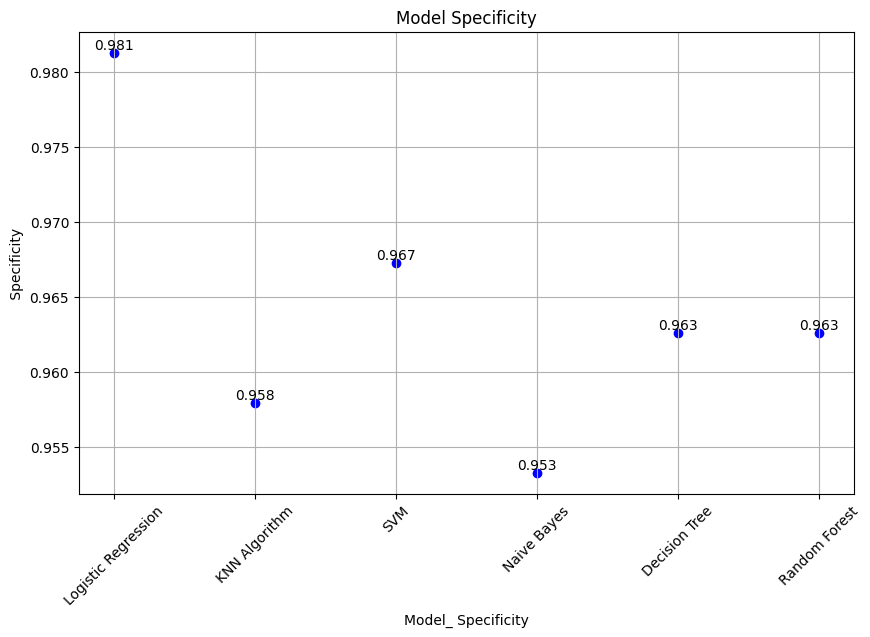

In [145]:
#  Specificity PLOT
import matplotlib.pyplot as plt

models = ['Logistic Regression', 'KNN Algorithm', 'SVM', 'Naive Bayes', 'Decision Tree', 'Random Forest']
Specificity = [logistic_metrics[3], knn_metrics[3], svm_metrics[3], naivebayes_metrics[3], dt_metrics[3], rf_metrics[3]]

plt.figure(figsize=(10, 6))
plt.scatter(models, Specificity, color='blue', marker='o')

plt.xlabel('Model_ Specificity')
plt.ylabel(' Specificity ')
plt.title('Model Specificity')
plt.xticks(rotation=45)

for i in range(len(models)):
    plt.text(models[i], Specificity[i], f"{Specificity[i]:.3f}", ha='center', va='bottom')
plt.grid(True)
plt.show()

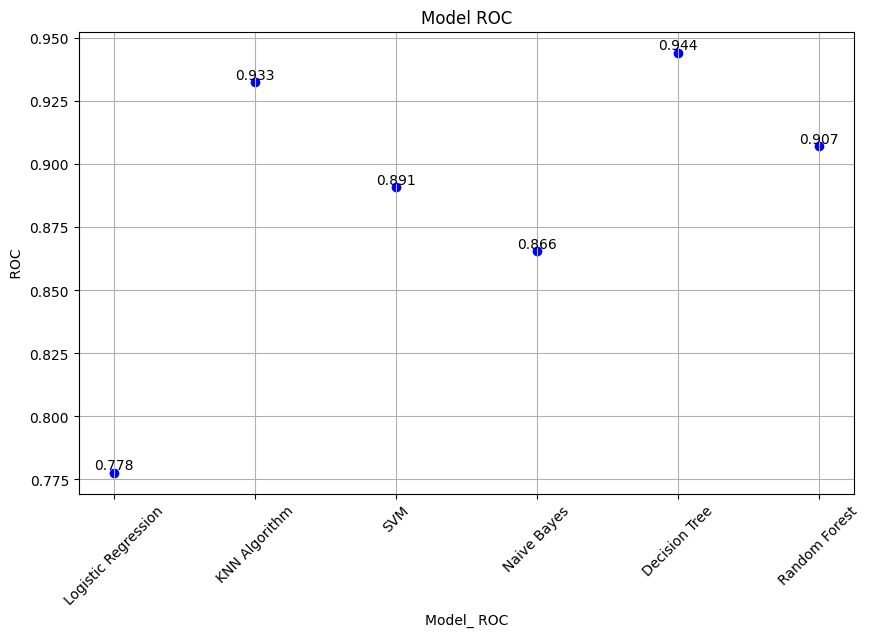

In [146]:
#  ROC PLOT
import matplotlib.pyplot as plt

models = ['Logistic Regression', 'KNN Algorithm', 'SVM', 'Naive Bayes', 'Decision Tree', 'Random Forest']
ROC = [logistic_metrics[4], knn_metrics[4], svm_metrics[4], naivebayes_metrics[4], dt_metrics[4], rf_metrics[4]]

plt.figure(figsize=(10, 6))
plt.scatter(models, ROC, color='blue', marker='o')

plt.xlabel('Model_ ROC')
plt.ylabel(' ROC ')
plt.title('Model ROC')
plt.xticks(rotation=45)

for i in range(len(models)):
    plt.text(models[i], ROC[i], f"{ROC[i]:.3f}", ha='center', va='bottom')
plt.grid(True)
plt.show()

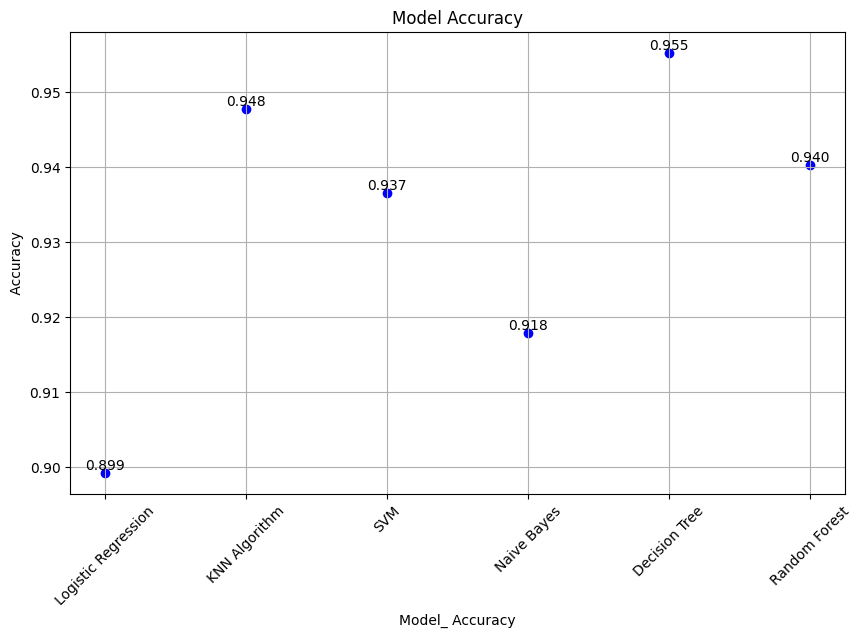

In [151]:
#  ACCURACY PLOT
import matplotlib.pyplot as plt
#accuracy_variables = [accuracyLG, accuracyKNN, accuracySVM, accuracyNaiveBayes, accuracyDT, accuracyRF]
models = ['Logistic Regression', 'KNN Algorithm', 'SVM', 'Naive Bayes', 'Decision Tree', 'Random Forest']
Accuracy_variable = [accuracyLG, accuracyKNN, accuracySVM, accuracyNaiveBayes, accuracyDT, accuracyRF]

plt.figure(figsize=(10, 6))
plt.scatter(models, Accuracy_variable, color='blue', marker='o')

plt.xlabel('Model_ Accuracy')
plt.ylabel(' Accuracy ')
plt.title('Model Accuracy')
plt.xticks(rotation=45)

for i in range(len(models)):
    plt.text(models[i], Accuracy_variable[i], f"{Accuracy_variable[i]:.3f}", ha='center', va='bottom')
plt.grid(True)
plt.show()